In [144]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [145]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)



In [146]:
#X['happyage'] = np.log(X['happy']*X['agea']+1)
X['beh'] = np.log(X['pplfair']*X['pplhlp']+1)
X = X.drop(['CH','CZ','DE','ES','NO','SE','gndr','pplhlp','pplfair','year','sclact','happy'],axis=1)
X.head()

,tvtot,ppltrst,sclmeet,agea,beh
0,3.0,3.0,5.0,60.0,3.931826
1,6.0,5.0,3.0,59.0,3.583519
2,1.0,8.0,6.0,24.0,4.174387
3,4.0,6.0,6.0,64.0,3.761200
4,5.0,6.0,7.0,55.0,3.583519


In [147]:
names = X.columns
X = pd.DataFrame(preprocessing.scale(X), columns = names)

In [148]:
X.corr()


,tvtot,ppltrst,sclmeet,agea,beh
tvtot,1.000000,-0.142422,-0.078864,0.257674,-0.099901
ppltrst,-0.142422,1.000000,0.122555,-0.029412,0.566736
sclmeet,-0.078864,0.122555,1.000000,-0.194443,0.092570
agea,0.257674,-0.029412,-0.194443,1.000000,0.009098
beh,-0.099901,0.566736,0.092570,0.009098,1.000000


In [149]:
# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]


In [161]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'loss': 'deviance',
          'min_samples_split': 800,
          'min_samples_leaf': 60,
          'max_features': 5,
          'random_state': 10,
          'learning_rate': 0.05,
           'n_estimators': 10,
          'max_depth': 5,
         'subsample': 1}


# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.012138570649208947
Percent Type II errors: 0.2580469176213857

Test set accuracy:
Percent Type I errors: 0.024539877300613498
Percent Type II errors: 0.25030674846625767


***Model 0***

Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191

***Model 1***

X['happyage'] = X['happy']*X['agea']
X = X.drop(['CH','CZ','DE','ES','NO','SE'],axis=1)

params = {'n_estimators': 1000,
          'max_depth': 3,
          'loss': 'deviance',
         'subsample': 1
         }

Training set accuracy:
Percent Type I errors: 0.028777959629023457
Percent Type II errors: 0.13243316966721222

Test set accuracy:
Percent Type I errors: 0.0834355828220859
Percent Type II errors: 0.17791411042944785

***Model 2***
X = pd.DataFrame(preprocessing.scale(X), columns = names)
X['beh'] = np.log(X['pplfair']*X['pplhlp']+1)
X = X.drop(['CH','CZ','DE','ES','NO','SE','gndr','pplhlp','pplfair','year','sclact','happy'],axis=1)

Training set accuracy:
Percent Type I errors: 0.03491543917075832
Percent Type II errors: 0.2041734860883797

Test set accuracy:
Percent Type I errors: 0.05030674846625767
Percent Type II errors: 0.2147239263803681

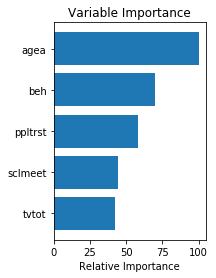

In [101]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()